In [0]:
# Import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data
data = pd.read_csv('phishing.csv')
data.head(10)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
5,6,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1
6,7,1,0,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1,-1
7,8,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,0,1,-1
8,9,1,0,-1,1,1,-1,1,1,-1,1,1,-1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,1,1,1,0,1,1
9,10,1,1,-1,1,1,-1,-1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,0,-1,1,0,1,-1


In [3]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
index,1,2,3,4,5,6,7,8,9,10
having_IPhaving_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URLURL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1


In [0]:
 #The dataset is filled with -1, 0 and 1 values. Nothing else. So, we might not need data scaling

In [5]:

# Data dimension
data.shape

(11055, 32)

In [6]:
data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')


Finding out the distribution of the class labels and preparing a report

In [7]:
from collections import Counter

classes = Counter(data['Result'].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

In [8]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898



Preparing a basic bar plot of the distribution of the class labels

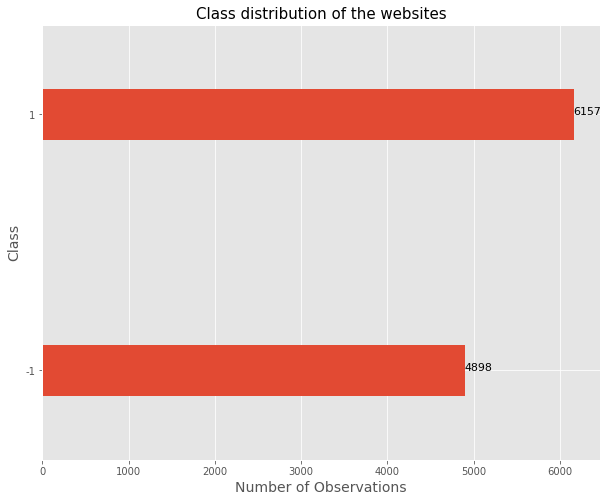

In [9]:
%matplotlib inline
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

Finding out the summary statistics from the data

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,11055.0,5528.000000,3191.447947,1.0,2764.5,5528.0,8291.5,11055.0
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0


Finding out the basic information of the columns present in the dataset

In [11]:
  data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

Mapping the -1 values to 0 in the class labels

In [12]:
data.rename(columns={'Result': 'Class'}, inplace=True)

data['Class'] = data['Class'].map({-1:0, 1:1})
data['Class'].unique()

array([0, 1])


Inspection of null values in the dataset

In [13]:
data.isna().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

Data splitting

In [0]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:30].values.astype(int)
y = data.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random.seed(7))

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns


def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title('Confusion matrix')
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



#Fitting the training data to the Different model

##1)Logistic Regression

The dataset contains all of its values in -1, 0 and 1. So, linear models like Logistic Regression are specifically good at figuring out the relationships between the features of the dataset which only contain -1, 0 and 1 values.

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(accuracy_score(y_test, logreg.predict(X_test))*100.))
print('\n')
print('----Classification report of the Logistic Regression classifier with default hyperparameter value----')
print('\n')
print(classification_report(y_test, logreg.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))

Accuracy score of the Logistic Regression classifier with default hyperparameter values 90.99%


----Classification report of the Logistic Regression classifier with default hyperparameter value----


                   precision    recall  f1-score   support

Phishing Websites       0.80      0.43      0.56       367
  Normal Websites       0.92      0.98      0.95      2397

         accuracy                           0.91      2764
        macro avg       0.86      0.71      0.75      2764
     weighted avg       0.90      0.91      0.90      2764



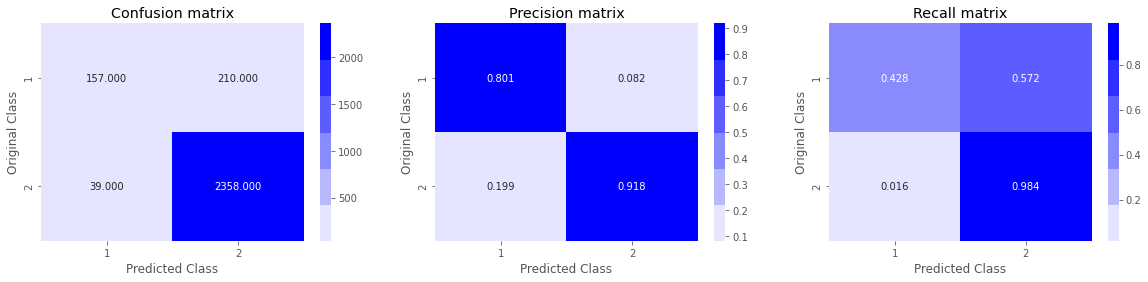

In [18]:
plot_confusion_matrix(y_test, logreg.predict(X_test))

##2) Hyperparameter tuning with random searching

In [0]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of values
penalty = ['l1', 'l2']
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250,300]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

In [21]:
# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

Best score: 91.27 using {'tol': 0.01, 'penalty': 'l2', 'max_iter': 200, 'C': 1.0}


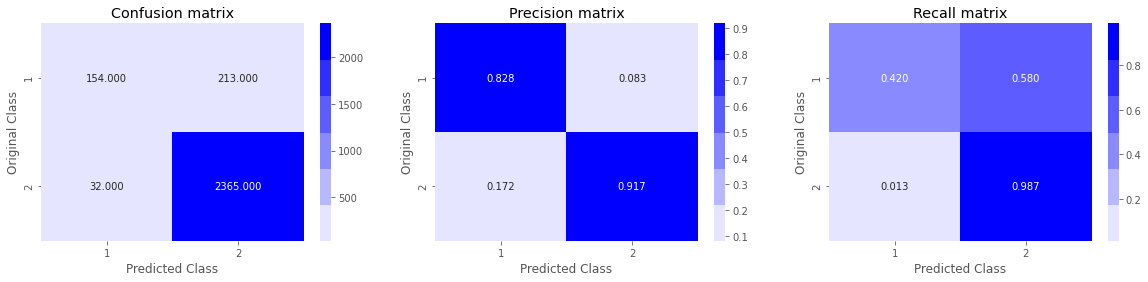

In [22]:
plot_confusion_matrix(y_test, random_model_result.predict(X_test))

##3)decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree=DecisionTreeClassifier()
dtc=dtree.fit(X_train, y_train)

In [0]:
dtc_pred=dtc.predict(X_test)

In [26]:
print("accuracy with decision tree is :",accuracy_score(dtc_pred,y_test))

accuracy with decision tree is : 0.9157018813314037


##4)knn classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn=KNeighborsClassifier(n_neighbors=3)
knc= knn.fit(X_train,y_train)

In [0]:
knn_predict=knc.predict(X_test)

In [30]:
accuracy_score(knn_predict,y_test)

0.8643270622286541

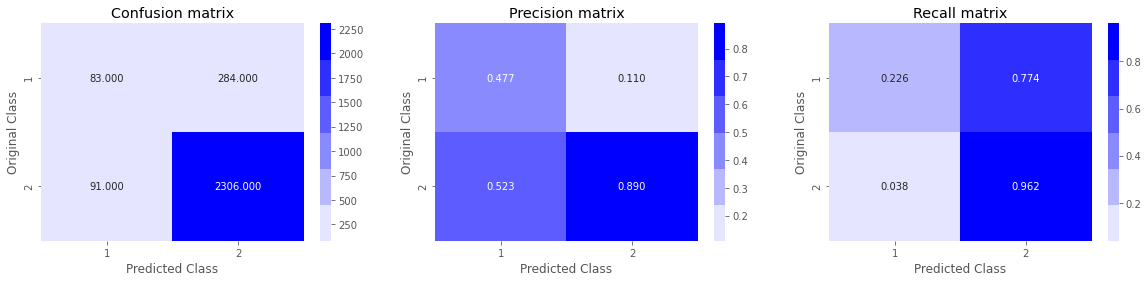

In [31]:
plot_confusion_matrix(y_test, knn_predict)

##5) random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc=RandomForestClassifier()
rfcm=rfc.fit(X_train,y_train)

In [34]:
rfc_predict=rfcm.predict(X_test)
accuracy_score(rfc_predict,y_test)

0.9403039073806078

In [35]:
print(classification_report(rfc_predict,y_test))

              precision    recall  f1-score   support

          -1       0.62      0.90      0.73       254
           1       0.99      0.94      0.97      2510

    accuracy                           0.94      2764
   macro avg       0.81      0.92      0.85      2764
weighted avg       0.96      0.94      0.95      2764



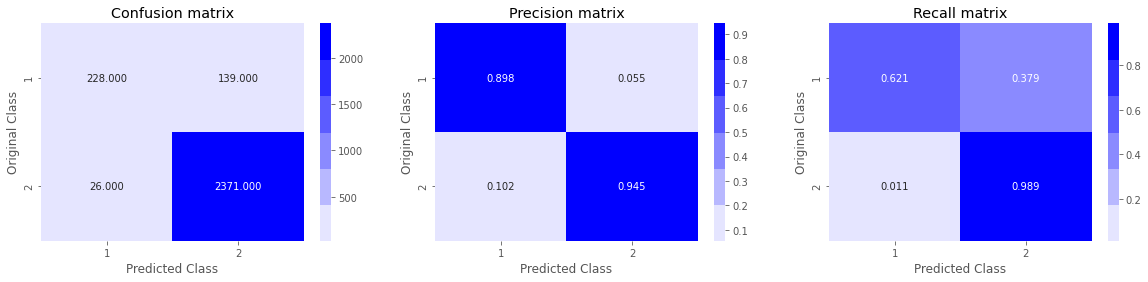

In [36]:
plot_confusion_matrix(y_test, rfc_predict)

#Trying to improve the predictive performance with Neural Networks

In [37]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

Using TensorFlow backend.


In [38]:

# Model building using the Sequential API
model = Sequential()

model.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience=5)

In [40]:
history = model.fit(X_train, y_train, batch_size=64, epochs=12, verbose=1, callbacks=[es_cb])

scores = model.evaluate(X_test, y_test)
scores

Epoch 1/12
8291/8291 [==============================] - 0s 36us/step - loss: 0.6054 - accuracy: 0.8378
Epoch 2/12
8291/8291 [==============================] - 0s 19us/step - loss: 0.5632 - accuracy: 0.8573
Epoch 3/12
8291/8291 [==============================] - 0s 23us/step - loss: 0.5619 - accuracy: 0.8572
Epoch 4/12
8291/8291 [==============================] - 0s 21us/step - loss: 0.5579 - accuracy: 0.8568
Epoch 5/12
8291/8291 [==============================] - 0s 19us/step - loss: 0.5528 - accuracy: 0.8551
Epoch 6/12
2764/2764 [==============================] - 0s 27us/step


[0.4993011061689788, 0.8668596148490906]

##Visualizing the performance of the network

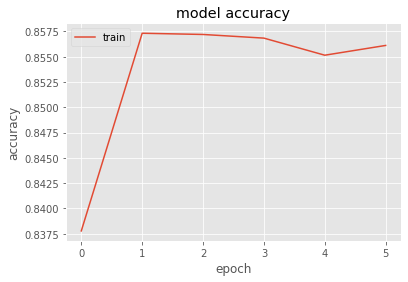

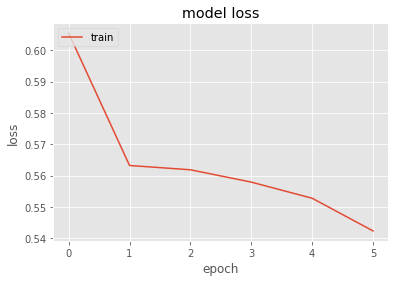

In [41]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#extracting features from random urls and testing 

In [42]:
!pip install tldextract

In [43]:
!pip install whois

In [44]:
!pip install favicon

In [0]:
import regex    
from tldextract import extract
import ssl
import socket
from bs4 import BeautifulSoup
import urllib.request
import whois
import datetime
from urllib.parse import urlparse,urlencode
import re
import requests
from datetime import datetime
import time
import socket
import favicon
from urllib.error import HTTPError
from cython.parallel import prange


def url_having_ip(url):
  symbol = regex.findall(r'(http((s)?)://)((((\d)+).)*)((\w)+)(/((\w)+))?',url)
  if(len(symbol)!=0):
    having_ip = 1 #phishing
  else:
     having_ip = -1
  return(having_ip)


def url_length(url):
    length=len(url)
    if(length<54):
        return -1
    elif(54<=length<=75):
        return 0
    else:
        return 1


def url_short(url):
    #ongoing
    return 0

def having_at_symbol(url):
    symbol=regex.findall(r'@',url)
    if(len(symbol)==0):
        return -1
    else:
        return 1 
    
def doubleSlash(url):
    #ongoing
    return 1

def prefix_suffix(url):
    subDomain, domain, suffix = extract(url)
    if(domain.count('-')):
        return 1
    else:
        return -1

def sub_domain(url):
    subDomain, domain, suffix = extract(url)
    if(subDomain.count('.')==0):
        return -1
    elif(subDomain.count('.')==1):
        return 0
    else:
        return 1

def SSLfinal_State(url):
    try:
#check wheather contains https       
        if(regex.search('^https',url)):
            usehttps = 1
        else:
            usehttps = 0
#getting the certificate issuer to later compare with trusted issuer 
        #getting host name
        subDomain, domain, suffix = extract(url)
        host_name = domain + "." + suffix
        context = ssl.create_default_context()
        sct = context.wrap_socket(socket.socket(), server_hostname = host_name)
        sct.connect((host_name, 443))
        certificate = sct.getpeercert()
        issuer = dict(x[0] for x in certificate['issuer'])
        certificate_Auth = str(issuer['commonName'])
        certificate_Auth = certificate_Auth.split()
        if(certificate_Auth[0] == "Network" or certificate_Auth == "Deutsche"):
            certificate_Auth = certificate_Auth[0] + " " + certificate_Auth[1]
        else:
            certificate_Auth = certificate_Auth[0] 
        trusted_Auth = ['Comodo','Symantec','GoDaddy','GlobalSign','DigiCert','StartCom','Entrust','Verizon','Trustwave','Unizeto','Buypass','QuoVadis','Deutsche Telekom','Network Solutions','SwissSign','IdenTrust','Secom','TWCA','GeoTrust','Thawte','Doster','VeriSign']        
#getting age of certificate
        startingDate = str(certificate['notBefore'])
        endingDate = str(certificate['notAfter'])
        startingYear = int(startingDate.split()[3])
        endingYear = int(endingDate.split()[3])
        Age_of_certificate = endingYear-startingYear
        
#checking final conditions
        if((usehttps==1) and (certificate_Auth in trusted_Auth) and (Age_of_certificate>=1) ):
            return -1 #legitimate
        elif((usehttps==1) and (certificate_Auth not in trusted_Auth)):
            return 0 #suspicious
        else:
            return 1 #phishing
        
    except Exception as e:
        
        return 1

def domain_registration(url):
    try:
        w = whois.whois(url)
        updated = w.updated_date
        exp = w.expiration_date
        length = (exp[0]-updated[0]).days
        if(length<=365):
            return 1
        else:
            return -1
    except:
        return 0

def favicon1(url):
  icons = favicon.get('https://www.python.org/')
  if len(icons)<=4:
    return -1
  else:
    return 1

def port(url):
    #ongoing
    return 0

def https_token(url):
    subDomain, domain, suffix = extract(url)
    host =subDomain +'.' + domain + '.' + suffix 
    if(host.count('https')): #attacker can trick by putting https in domain part
        return 1
    else:
        return -1

def request_url(url):
    try:
        subDomain, domain, suffix = extract(url)
        websiteDomain = domain
        
        opener = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(opener, 'lxml')
        imgs = soup.findAll('img', src=True)
        total = len(imgs)
        
        linked_to_same = 0
        avg =0
        for image in imgs:
            subDomain, domain, suffix = extract(image['src'])
            imageDomain = domain
            if(websiteDomain==imageDomain or imageDomain==''):
                linked_to_same = linked_to_same + 1
        vids = soup.findAll('video', src=True)
        total = total + len(vids)
        
        for video in vids:
            subDomain, domain, suffix = extract(video['src'])
            vidDomain = domain
            if(websiteDomain==vidDomain or vidDomain==''):
                linked_to_same = linked_to_same + 1
        linked_outside = total-linked_to_same
        if(total!=0):
            avg = linked_outside/total
            
        if(avg<0.22):
            return -1
        elif(0.22<=avg<=0.61):
            return 0
        else:
            return 1
    except:
        return 0


def url_of_anchor(url):
    try:
        subDomain, domain, suffix = extract(url)
        websiteDomain = domain
        
        opener = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(opener, 'lxml')
        anchors = soup.findAll('a', href=True)
        total = len(anchors)
        linked_to_same = 0
        avg = 0
        for anchor in anchors:
            subDomain, domain, suffix = extract(anchor['href'])
            anchorDomain = domain
            if(websiteDomain==anchorDomain or anchorDomain==''):
                linked_to_same = linked_to_same + 1
        linked_outside = total-linked_to_same
        if(total!=0):
            avg = linked_outside/total
            
        if(avg<0.31):
            return -1
        elif(0.31<=avg<=0.67):
            return 0
        else:
            return 1
    except:
        return 0
    
def Links_in_tags(url):
    try:
        opener = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(opener, 'lxml')
        
        no_of_meta =0
        no_of_link =0
        no_of_script =0
        anchors=0
        avg =0
        for meta in soup.find_all('meta'):
            no_of_meta = no_of_meta+1
        for link in soup.find_all('link'):
            no_of_link = no_of_link +1
        for script in soup.find_all('script'):
            no_of_script = no_of_script+1
        for anchor in soup.find_all('a'):
            anchors = anchors+1
        total = no_of_meta + no_of_link + no_of_script+anchors
        tags = no_of_meta + no_of_link + no_of_script
        if(total!=0):
            avg = tags/total

        if(avg<0.25):
            return -1
        elif(0.25<=avg<=0.81):
            return 0
        else:
            return 1        
    except:        
        return 0

def sfh(url):
    #ongoing
    return 0

def email_submit(url):
    try:
        opener = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(opener, 'lxml')
        if(soup.find('mailto:')):
            return 1
        else:
            return -1 
    except:
        return 0

def abnormal_url(url):
    #ongoing
    return 0

def redirect(url):
    #ongoing
    return 0

def on_mouseover(url):
    #ongoing
    return 0

def rightClick(url):
    #ongoing
    return 0

def popup(url):
    #ongoing
    return 0

def iframe(url):
    #ongoing
    return 0

def age_of_domain(url):
    try:
        w = whois.whois(url)
        start_date = w.creation_date
        current_date = datetime.datetime.now()
        age =(current_date-start_date[0]).days
        if(age>=180):
            return -1
        else:
            return 1
    except Exception as e:
        print(e)
        return 0
        
def dns(url):
    #ongoing
    return 0

def web_traffic(url):
    #ongoing
    return 0

def page_rank(url):
    #ongoing
    return 0

def google_index(url):
    #ongoing
    return 0


def links_pointing(url):
    #ongoing
    return 0

def statistical(url):
    #ongoing
    return 0


In [0]:
def extractur(url):
    check = [[url_having_ip(url),url_length(url),url_short(url),having_at_symbol(url),
             doubleSlash(url),prefix_suffix(url),sub_domain(url),SSLfinal_State(url),
              domain_registration(url),favicon1(url),port(url),https_token(url),request_url(url),
              url_of_anchor(url),Links_in_tags(url),sfh(url),email_submit(url),abnormal_url(url),
              redirect(url),on_mouseover(url),rightClick(url),popup(url),iframe(url),
              age_of_domain(url),dns(url),web_traffic(url),page_rank(url),google_index(url),
              links_pointing(url),statistical(url)]]
    
    
    print(check)
    return check

In [49]:
ur='https://www1.movie4u.live/'
ee= extractur(ur)

[[1, -1, 0, -1, 1, -1, -1, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [50]:
out=dtc.predict(ee)
print(out)

[-1]
